In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('D:/codes/python/diabeties.csv')
len(dataset)
dataset.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
zero_not_accepted = ["Glucose","BloodPressure","SkinThickness","BMI","Insulin"]
for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0,dataset[column].mean())
    mean = int(dataset[column].mean(skipna=True))
    # dataset[column] = dataset[column].mean()
dataset.head(50)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.000000,35.00000,83.204082,33.600000,0.627,50,1
1,1,85,66.000000,29.00000,83.204082,26.600000,0.351,31,0
2,8,183,64.000000,19.44898,83.204082,23.300000,0.672,32,1
3,1,89,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,0,137,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5,116,74.000000,19.44898,83.204082,25.600000,0.201,30,0
6,3,78,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115,70.591837,19.44898,83.204082,35.300000,0.134,29,0
8,2,197,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8,125,96.000000,19.44898,83.204082,31.895918,0.232,54,1


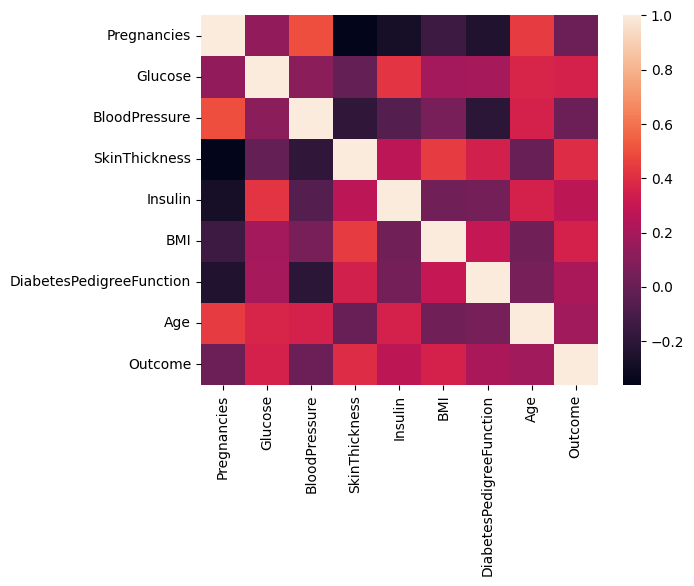

In [10]:
# import matplotlib.pyplot as plt;
# plt.imshow(dataset, cmap='hot', interpolation='nearest')
# plt.show()
sns.heatmap(dataset.corr())
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 7].values


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1].values, y, test_size = 0.23, random_state= 2)
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(12, 8)
(12,)
(37, 8)
(37,)


In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 1000000)
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=1000000)

In [15]:
score = logreg.score(x_test,y_test)
score

0.08333333333333333

In [16]:
from sklearn.metrics import confusion_matrix
predictions = logreg.predict(x_test)
cm = confusion_matrix(y_test, predictions)
print(cm)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]]
